In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('https://m2pi.syzygy.ca/data/cruise_ship_info.csv')

In [3]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [4]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


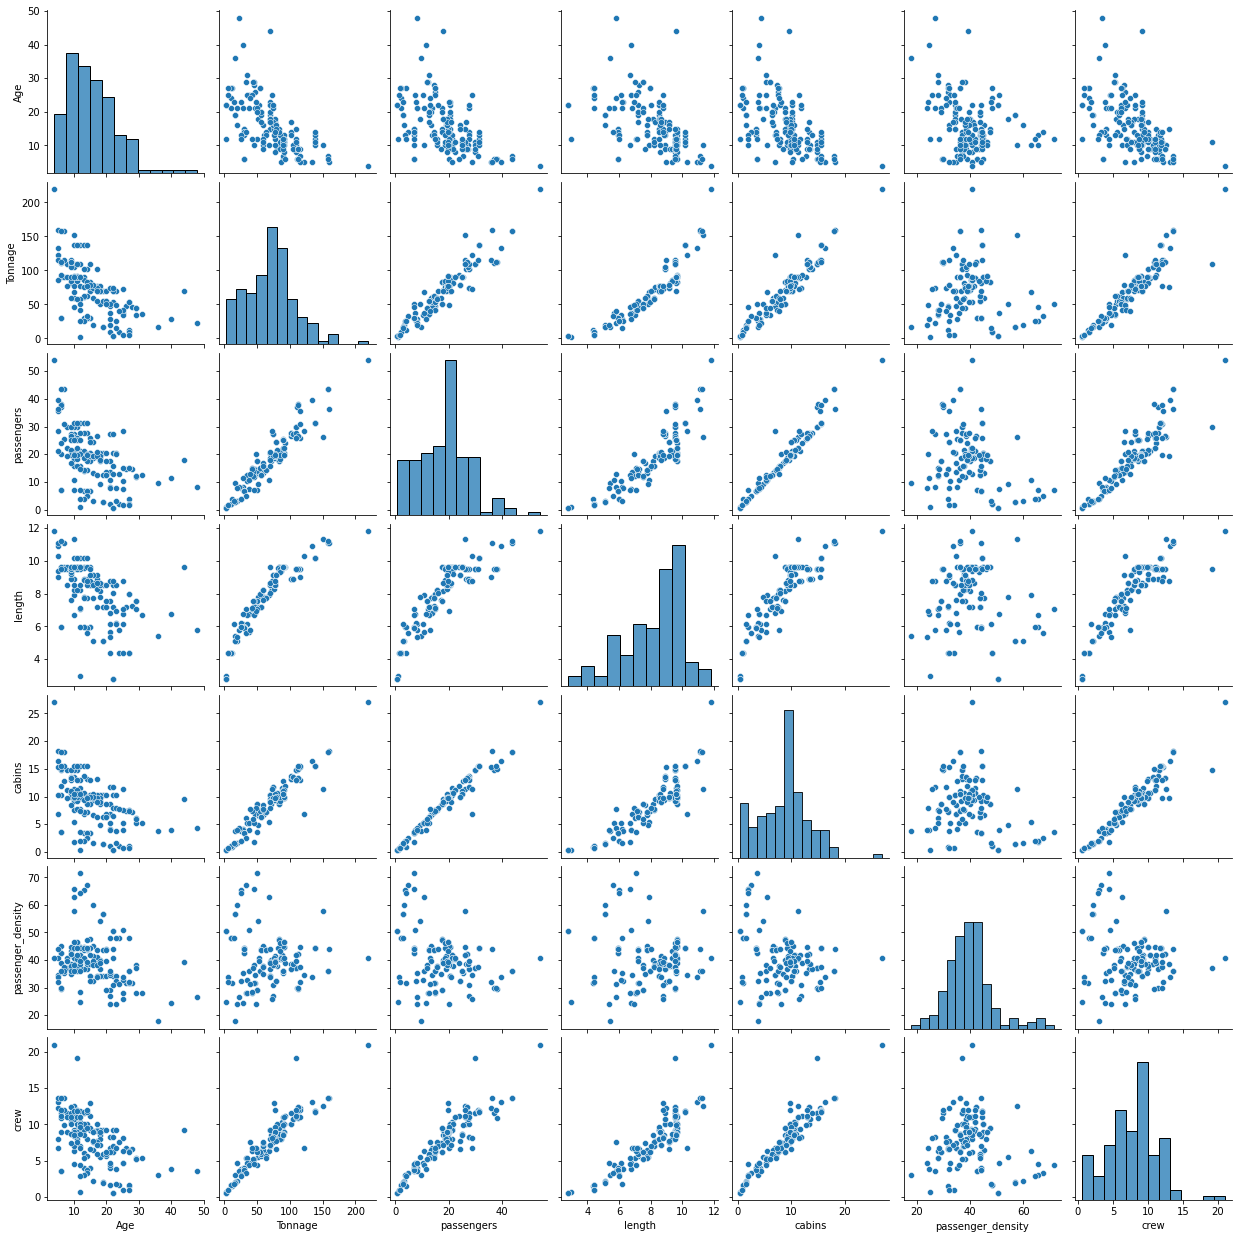

In [5]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
sns.pairplot(df[cols])

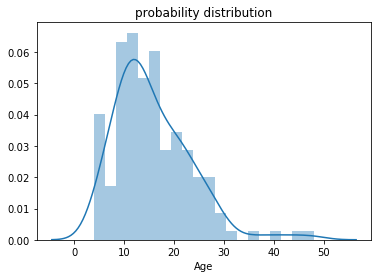

In [8]:
sns.distplot(df['Age'],bins=20)
plt.title('probability distribution')
plt.show()

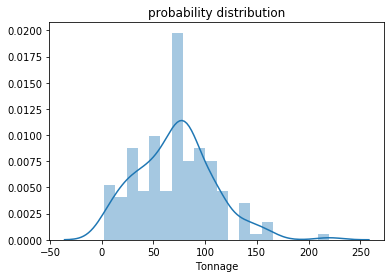

In [9]:
sns.distplot(df['Tonnage'],bins=20)
plt.title('probability distribution')
plt.show()


In [10]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,7)].values)

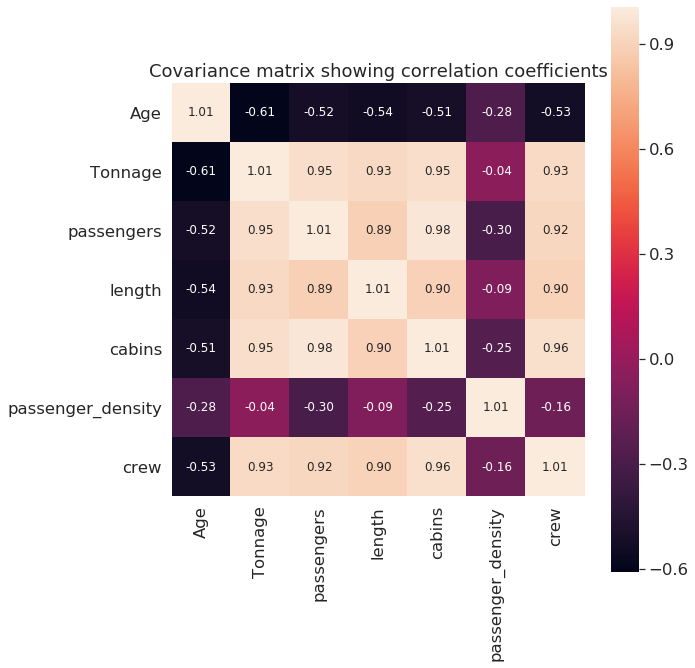

In [11]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

So crew size is strongly correlated with Tonnage, Passengers, length, cabins and crew

In [12]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
df[cols_selected].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


In [13]:
X = df[cols_selected].iloc[:,0:4].values    # features matrix 
y = df[cols_selected]['crew'].values        # target variable

In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0 ,1])
pd.get_dummies(df[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']])

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

In [16]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([])

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,22,3.341,0.66,2.79,0.33,50.62,0.59,0,0,0,...,0,0,0,0,0,0,0,0,1,0
154,14,76.800,19.60,8.79,9.67,39.18,12.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
155,25,5.350,1.58,4.40,0.74,33.86,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1
156,27,5.350,1.67,4.40,0.74,32.04,0.88,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
df2=pd.get_dummies(df[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']])

In [18]:
df2=pd.get_dummies(df[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']])

In [19]:
df2.head()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0


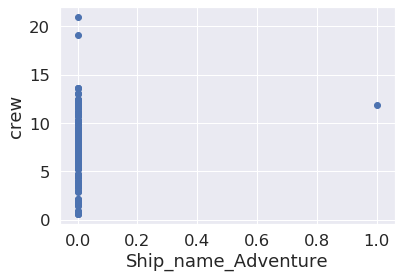

In [20]:
plt.scatter(df2['Ship_name_Adventure'],df2['crew'])
plt.xlabel('Ship_name_Adventure')
plt.ylabel('crew')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']


In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

In [23]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

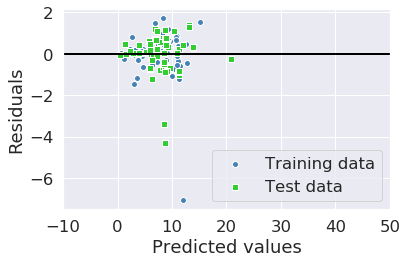

In [24]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

In [25]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 0.955, test: 0.889
R^2 train: 0.920, test: 0.928


In [26]:
slr.fit(X_train, y_train).intercept_

-0.7525074496158357

In [27]:
slr.fit(X_train, y_train).coef_

array([ 0.01902703, -0.15001099,  0.37876395,  0.77613801])

In [28]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']  
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

In [29]:
train_score = []
test_score = []

In [30]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))

In [31]:
train_score

array([0.92028261, 0.91733937, 0.94839385, 0.93899476, 0.90621451,
       0.91156903, 0.92726066, 0.94000795, 0.93922948, 0.93629554])

In [32]:
test_score

array([0.92827978, 0.93807946, 0.8741834 , 0.89901199, 0.94781315,
       0.91880183, 0.91437408, 0.89660876, 0.90427477, 0.90139208])

In [33]:
print('R2 train: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))

R2 train: 0.929 +/- 0.013


In [34]:
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

R2 test: 0.912 +/- 0.021


In [35]:
train_score = []
test_score = []
cum_variance = []

In [36]:
for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))
    cum_variance = np.append(cum_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

In [37]:
train_score


array([0.90411898, 0.9041488 , 0.90416405, 0.92028261])

In [38]:
test_score

array([0.89217843, 0.89174896, 0.89159266, 0.92827978])

In [39]:
cum_variance

array([0.949817  , 0.98322819, 0.99587366, 1.        ])

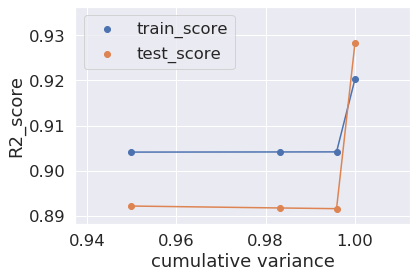

In [40]:
plt.scatter(cum_variance,train_score, label = 'train_score')
plt.plot(cum_variance, train_score)
plt.scatter(cum_variance,test_score, label = 'test_score')
plt.plot(cum_variance, test_score)
plt.xlabel('cumulative variance')
plt.ylabel('R2_score')
plt.legend()
plt.show()

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)

In [42]:
alpha = np.linspace(0.01,0.4,10)

In [43]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.7)

r2_train=[]
r2_test=[]
norm = []
for i in range(10):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std=lasso.predict(X_train_std)
    y_test_std=lasso.predict(X_test_std)
    r2_train=np.append(r2_train,r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test=np.append(r2_test,r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    norm= np.append(norm,np.linalg.norm(lasso.coef_))


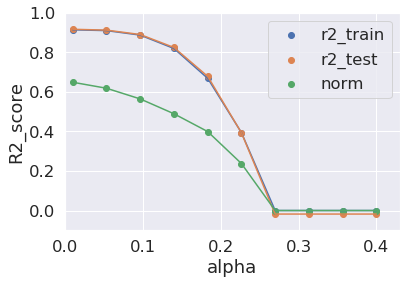

In [44]:
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()